<a href="https://colab.research.google.com/github/nhanguyene/HOMEWORK_AI_21_05_22/blob/main/CNN_Detect_Cifar100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import libraries
import pandas as pd
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
from keras.models import Sequential
import numpy as np
from keras.utils import np_utils
from keras.layers import Dense, Activation, Dropout,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.optimizers import SGD,Adam,RMSprop
from keras.callbacks import EarlyStopping 


In [2]:
#Import dataset
(train_images,train_labels),(test_images,test_labels)=datasets.cifar100.load_data()

169017344/169001437 [==============================] - 2s 0us/step


In [3]:
#Set data type
train_images=train_images.astype('float32')
test_images=test_images.astype('float32')
train_images/=255
test_images/=255
train_labels=np_utils.to_categorical(train_labels,100)
test_labels=np_utils.to_categorical(test_labels,100)

In [4]:
#Create model for train
model = Sequential()
model.add(Conv2D(input_shape=(32, 32, 3),  kernel_initializer='he_uniform',kernel_size=(2,2),padding='same',strides=(2,2),filters=32))
model.add(MaxPooling2D(pool_size=(2,2),strides=(1,1),padding='same'))
model.add(Conv2D(kernel_size=(2,2),padding='same',strides=(2,2),filters=64))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(1,1),padding='same'))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(100, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 64)          8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 512)               2

In [5]:
#Compile and Training
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_images,train_labels,batch_size=32,epochs=100,verbose=1,validation_data=(test_images,test_labels),callbacks=[EarlyStopping(monitor='val_loss',patience=10)])


Epoch 1/100
1563/1563 [==============================] - 19s 5ms/step - loss: 3.4659 - accuracy: 0.1819 - val_loss: 2.9817 - val_accuracy: 0.2701
Epoch 2/100
1563/1563 [==============================] - 7s 5ms/step - loss: 2.6691 - accuracy: 0.3242 - val_loss: 2.6050 - val_accuracy: 0.3432
Epoch 3/100
1563/1563 [==============================] - 7s 4ms/step - loss: 2.2848 - accuracy: 0.4025 - val_loss: 2.5361 - val_accuracy: 0.3647
Epoch 4/100
1563/1563 [==============================] - 7s 4ms/step - loss: 1.9549 - accuracy: 0.4724 - val_loss: 2.4883 - val_accuracy: 0.3871
Epoch 5/100
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6301 - accuracy: 0.5473 - val_loss: 2.6230 - val_accuracy: 0.3851
Epoch 6/100
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3161 - accuracy: 0.6243 - val_loss: 2.8521 - val_accuracy: 0.3797
Epoch 7/100
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0212 - accuracy: 0.6992 - val_loss: 3.1297 - val_a

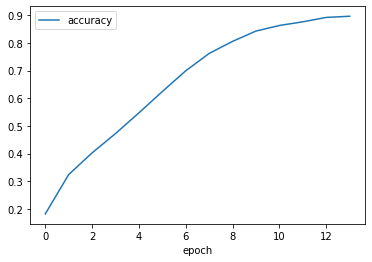

313/313 [==============================] - 1s 5ms/step - loss: 5.6835 - accuracy: 0.3614
Test error: 5.683497905731201
Test accuracy:  0.3614000082015991


In [6]:
#Draw plot and make evaluate
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.legend(['accuracy'])
plt.show()

score = model.evaluate(test_images,test_labels, verbose=1)
print('Test error:',score[0])
print('Test accuracy: ',score[1])


Index ? 21
Predicted value:  48
Correct value:  49


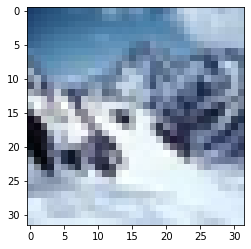

In [7]:
#Make test and predict
n=int(input("Index ? "))
plt.imshow(test_images[n].reshape(32,32,3))
y_predict = model.predict(test_images[n].reshape(1,32,32,3))
print('Predicted value: ', np.argmax(y_predict))
print('Correct value: ',np.argmax(test_labels[n]))